# サポートベクターマシン（Support Vector Machines）

サポートベクターマシン (SVM)は、サンプル群を上手に分類する境界線を見つけようとする方法。多クラス分類にも利用可能。

```
Part 1: SVMの原理
Part 2: カーネル法
Part 3: その他の資料
Part 4: scikit-learnでSVM
```

-----
## Part 1: SVMの原理

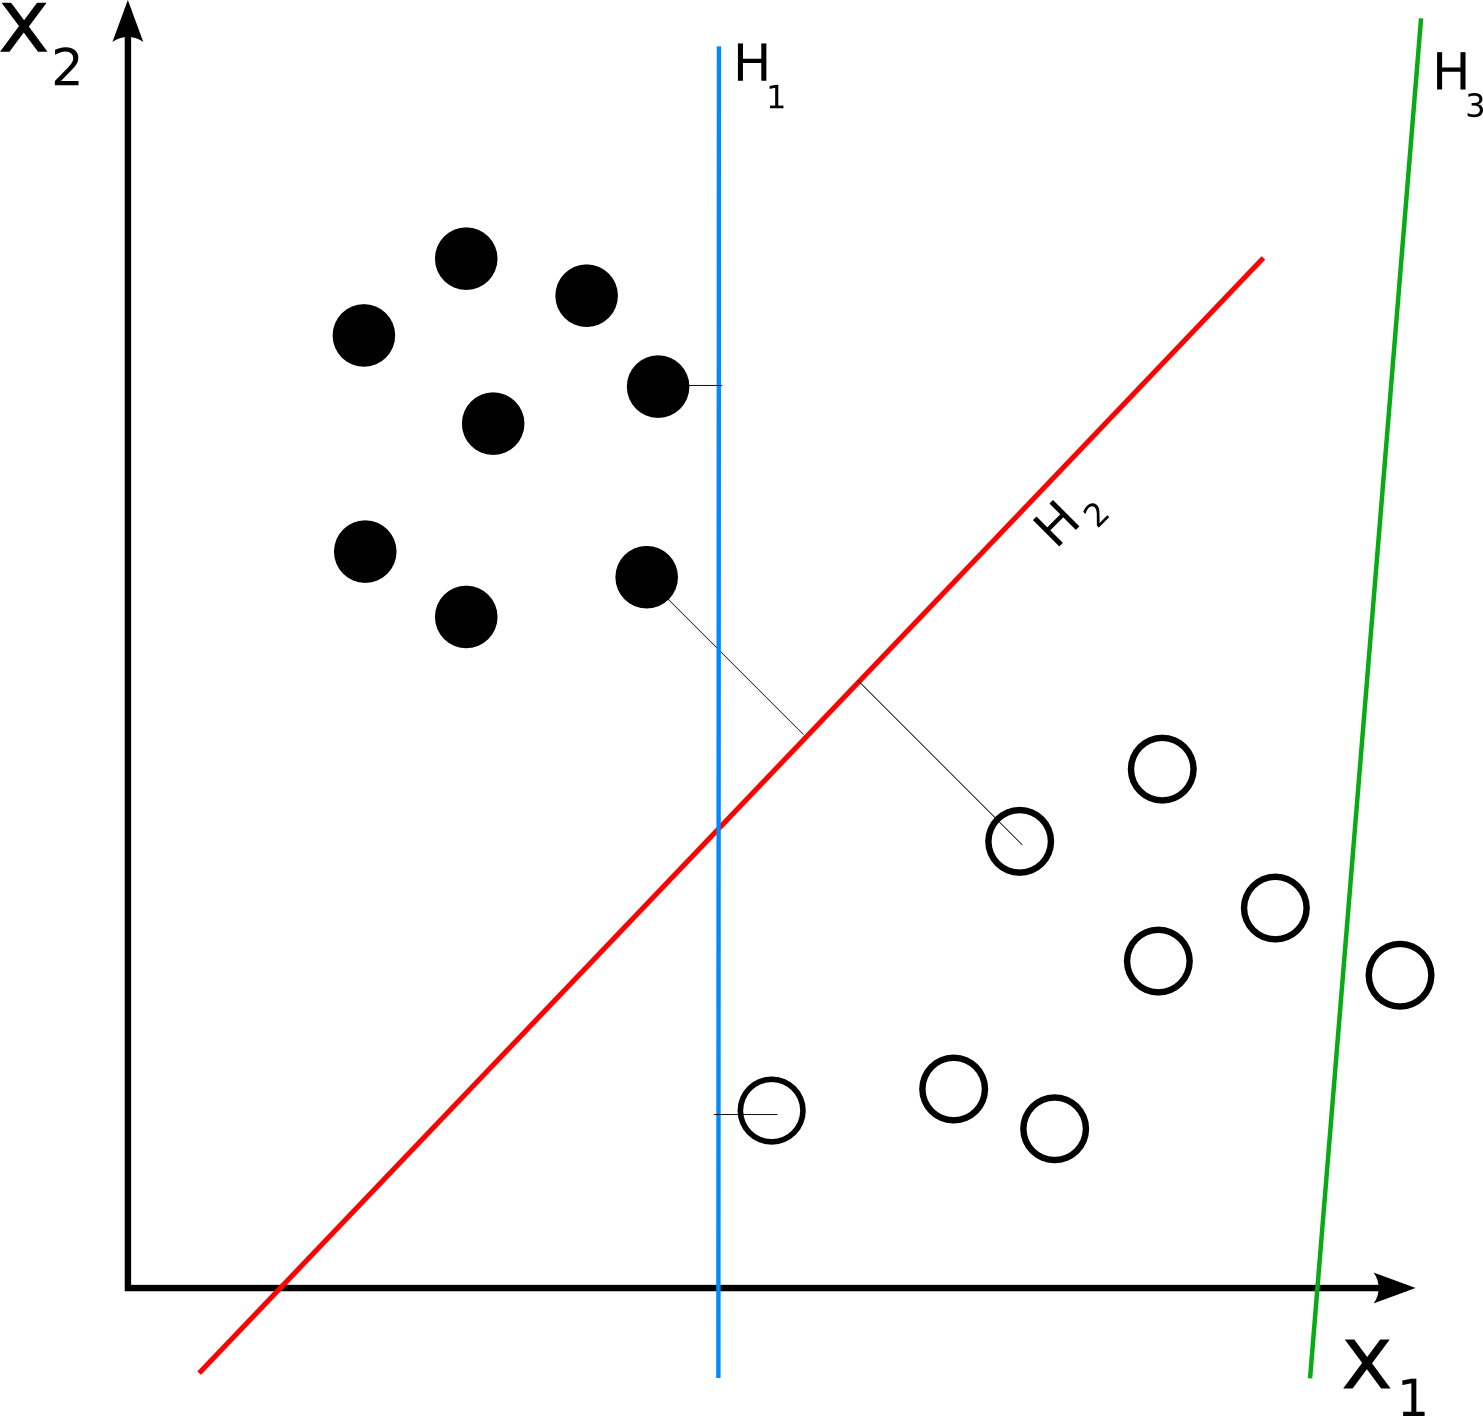

In [2]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url, width=450)

-----
## Part 2: カーネル法

いつも超平面で分離できるとは限らない。そんな時、役に立つのがカーネル法と呼ばれる工夫。

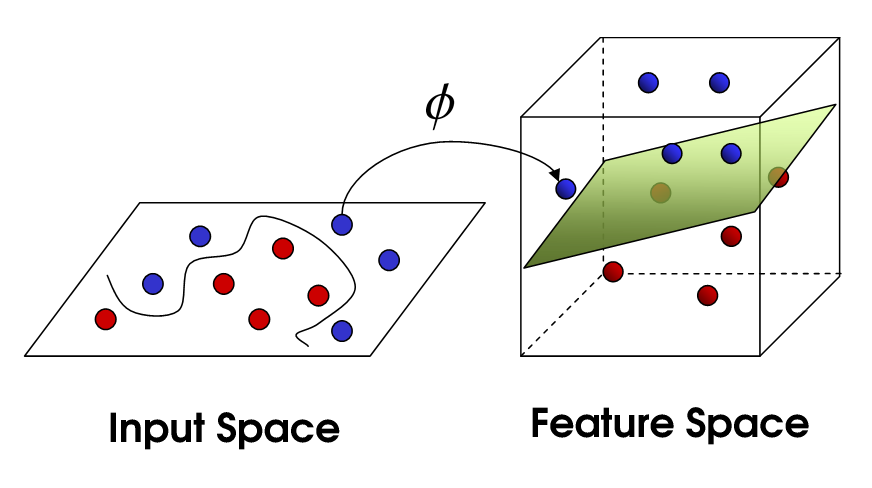

In [4]:
# 特徴量空間におけるカーネルトリック
url='http://i.imgur.com/WuxyO.png'
Image(url)

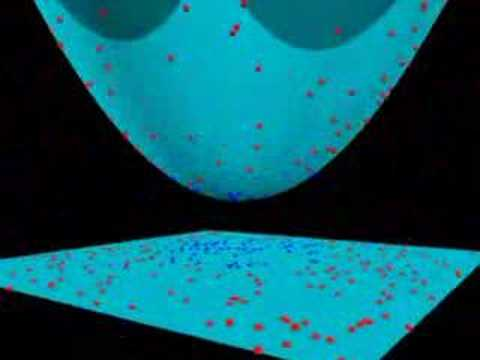

In [5]:
# カーネル法がよく分かる動画です。
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

-----
## Part 3: その他の資料

In [7]:
# Andrew Ng先生の講義
YouTubeVideo('qdnT_jGTg2s')

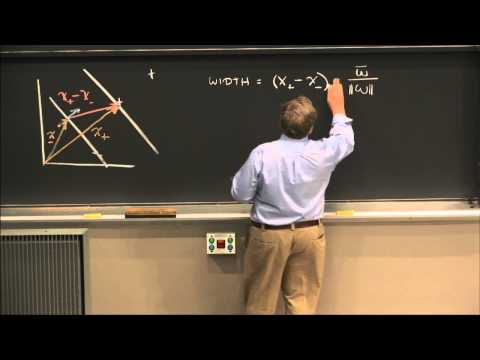

In [8]:
# MITの講義
YouTubeVideo('_PwhiWxHK8o')

-----
## Part 4: scikit-learnを使ったSVMの実際

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# irisデータをまた使う
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [12]:
from sklearn.svm import SVC

In [13]:
# インスタンス作成
model = SVC()

In [14]:
# データを分割
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

In [15]:
# モデルをトレーニング
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
#　精度を見る
from sklearn import metrics

predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected, predicted))

0.973684210526


非常に高い予測精度が得られた。
デフォルトでは、RBFカーネルが使われている。
それぞれのカーネルの違いをscikit-learnのドキュメントに詳しく載っている。

In [18]:
from sklearn import svm

# 図示できるのが2次元までなので、変数を2つに絞る
X = iris.data[:, :2]
Y = iris.target

# SVMの正則化パラメータ
C = 1.0

# Linear Kernel（線形カーネル）
svc = svm.SVC(kernel = 'linear', C = C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C = C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C = C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C = C).fit(X,Y)

In [19]:
# step size
h = 0.02

# X軸の最大最小
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y軸の最大最小
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# meshgridを作ります。
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [20]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


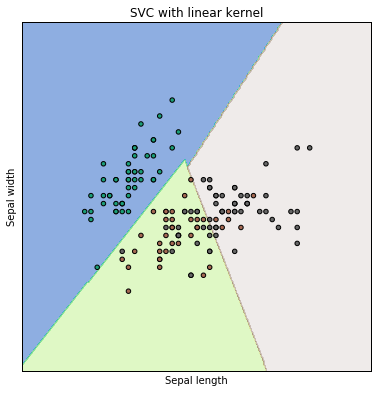

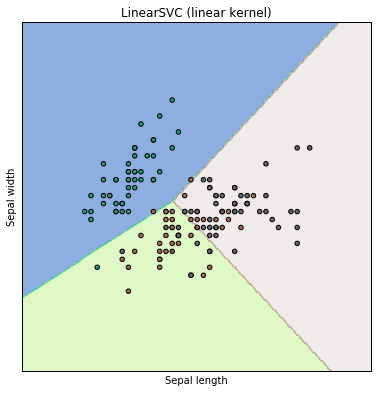

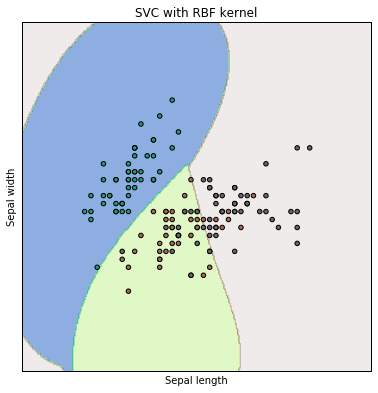

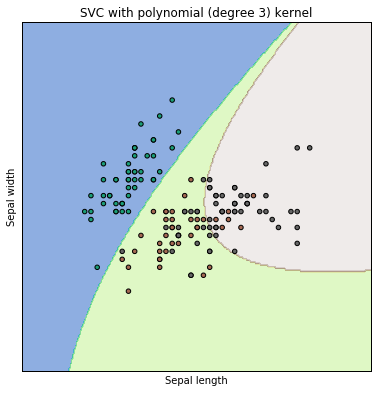

In [21]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # 境界線を描画します。
    plt.figure(figsize=(15,15))
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()